In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [2]:

# Loading  Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

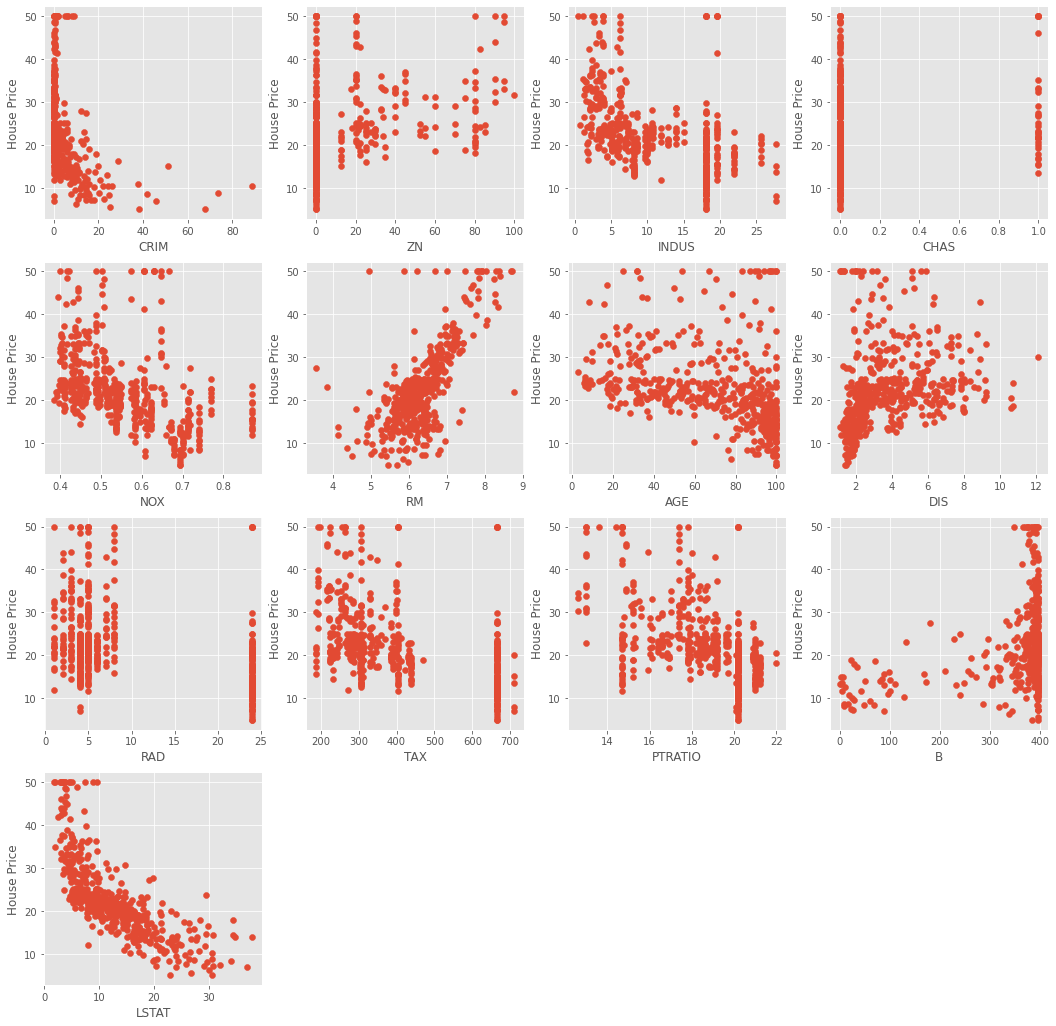

In [3]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 

for index, feature_name in enumerate(boston_dataset.feature_names): 
	ax = fig.add_subplot(4, 4, index + 1) 
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
	ax.set_ylabel('House Price', size = 12) 
	ax.set_xlabel(feature_name, size = 12) 

plt.show() 


In [4]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

print(boston_pd.head()) 


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [5]:
x_train, x_test, y_train, y_test = train_test_split( 
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1], 
	test_size = 0.25) 

print("Train data shape of X = % s and Y = % s : "%( 
	x_train.shape, y_train.shape)) 

print("Test data shape of X = % s and Y = % s : "%( 
	x_test.shape, y_test.shape)) 


Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [6]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 

# Train the model 
#alpha is hyperparameter change according to data
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) #features with coefficients shrank to zero are features which are not important to model



Mean squared error on test set 25.734225380355827
    Columns  Coefficient Estimate
0      CRIM             -0.084545
1        ZN              0.057637
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.630649
6       AGE              0.012258
7       DIS             -0.857037
8       RAD              0.276382
9       TAX             -0.016922
10  PTRATIO             -0.688171
11        B              0.008791
12    LSTAT             -0.655413


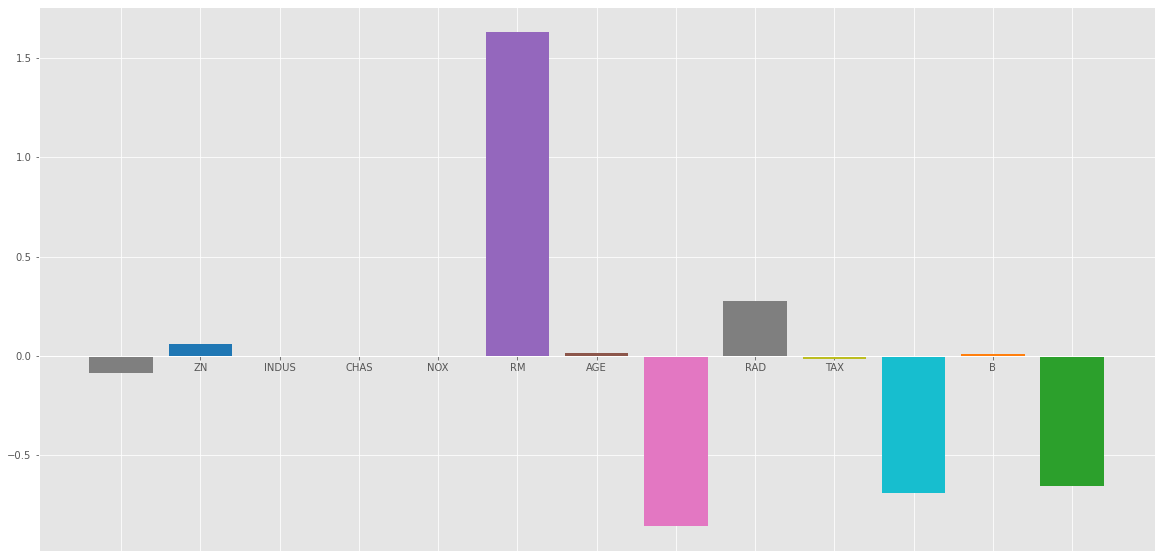

In [7]:
# plotting the coefficient score 
fig1, ax1 = plt.subplots(figsize =(20, 10)) 

color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax1.bar(lasso_coeff["Columns"], 
lasso_coeff['Coefficient Estimate'], 
color = color) 

ax1.spines['bottom'].set_position('zero') 

plt.style.use('ggplot') 
plt.show() 


In [8]:
selected_feat = x_train.columns
print('total features: {}'.format((x_train.shape[1])))   #total no. of features 
print('features with coefficients shrank to zero: {}'.format(
      np.sum(lasso.coef_ == 0)))     # no. of  features which are not important to model

total features: 13
features with coefficients shrank to zero: 3


In [9]:
removed_feats = x_train.columns[(lasso.coef_ == 0).ravel().tolist()]
removed_feats    #not important features 

Index(['INDUS', 'CHAS', 'NOX'], dtype='object')